# COVID-19 correlated variables of Mexican States

This Notebook downloads Geopandas GeoDataFrames for States (admin1) derived from the 2020 Mexican Census: [INEGI](https://www.inegi.org.mx/temas/mg/).

For details how these dataframe were created, see the [mexican-boundaries](https://github.com/sbl-sdsc/mexico-boundaries) GitHub project.

It also uses the variables of dataframe obtain in the [Week 3 analyzes](Week3States.ipynb).

In [1]:
from io import BytesIO
from urllib.request import urlopen
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columsns

## Boundaries of Mexican States

Read boundary polygons for Mexican states from shapefile

In [3]:
admin1_url = 'https://raw.githubusercontent.com/sbl-sdsc/mexico-boundaries/main/data/mexico_admin1.parquet'

In [4]:
resp = urlopen(admin1_url)
admin1 = gpd.read_parquet(BytesIO(resp.read()))

Calculate the area of each state (convert area from m^2 to km^2

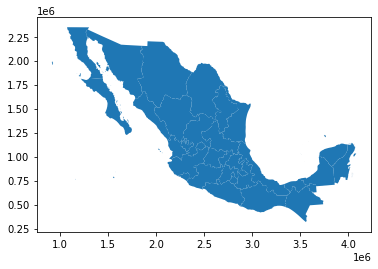

In [5]:
admin1.plot();

## Map of COVID-19 correlated variables by State

Get COVID-19 correlated variables from data files

In [6]:
var_admin1 = pd.read_csv('../data/week3analyzesStates.csv')

In [7]:
var_admin1.head()

,cve_ent,case_rate,case_rate_last_60_days,death_rate,death_rate_last_60_days,pct_disability,pct_limitation,pct_mental_problem,pct_no_problems,pct_no_med_insurance,pct_med_insurance,pct_pop_obesity,pct_pop_hypertension,pct_pop_diabetes,pct_pop_0_4_years_old,pct_pop_5_9_years_old,pct_pop_10_14_years_old,pct_pop_15_19_years_old,pct_pop_20_24_years_old,pct_pop_25_29_years_old,pct_pop_30_34_years_old,pct_pop_35_39_years_old,pct_pop_40_44_years_old,pct_pop_45_49_years_old,pct_pop_50_54_years_old,pct_pop_55_59_years_old,pct_pop_60_64_years_old,pct_pop_65_69_years_old,pct_pop_70_74_years_old,pct_pop_75_79_years_old,pct_pop_80_84_years_old,pct_pop_85_89_years_old,pct_pop_90_94_years_old,pct_pop_95_99_years_old,pct_pop_100_and_more_years_old,average_years_finish,average_household_size,pct_household_tics,pct_household_no_tics,retail_and_recreation_percent_change_average_from_baseline,grocery_and_pharmacy_percent_change_average_from_baseline,parks_percent_change_average_from_baseline,transit_stations_percent_change_average_from_baseline,workplaces_percent_change_average_from_baseline,residential_percent_change_average_from_baseline,population/sqkm
0,1,1860.682334,55.275384,171.193370,5.924852,4.969487,11.534781,1.405863,82.107156,18.268619,80.936196,32.593387,14.700566,7.556478,8.673286,8.673286,9.041812,9.198646,8.853820,8.254783,7.446145,6.918624,6.439129,5.901780,5.166541,4.103134,3.367128,2.497011,1.783450,1.155764,0.710006,0.388670,0.167987,0.055484,0.007807,10.35,3.68,99.557246,0.442754,25.425819,-0.716763,26.267823,33.957611,17.951830,-9.001927,258.089437
1,2,1383.213916,64.624080,237.917856,4.786969,4.180207,9.938985,1.444867,88.412151,23.008181,79.927662,48.366995,21.007712,9.974848,7.326291,7.326291,8.593104,8.683644,9.363724,9.030424,8.319119,8.035202,7.527399,7.176162,6.090675,4.639866,3.687122,2.605432,1.799928,1.124498,0.693395,0.342543,0.133650,0.041597,0.006933,10.20,3.26,99.165994,0.834006,23.980732,-4.487476,24.398844,19.418112,17.337187,-8.799615,49.442754
2,3,4501.384353,778.667542,184.663257,14.415167,4.396999,11.213136,1.295252,82.417100,16.064212,82.529564,42.849118,16.536911,8.369750,7.761200,7.761200,8.408640,8.135746,8.294064,8.549437,8.422807,8.068393,7.380193,6.433514,5.385432,4.191707,3.367060,2.395155,1.558951,1.014778,0.577725,0.317631,0.116315,0.041257,0.006835,10.34,3.30,98.915448,1.084552,29.959538,7.406551,29.190751,23.556840,23.728324,-9.028902,10.878742
3,4,1107.416724,162.699614,126.421998,5.596547,5.222678,11.288635,1.230641,75.280652,20.317864,71.923323,44.903811,26.108154,14.007917,7.888633,7.888633,8.011857,7.609305,7.550941,7.275311,7.266417,7.023167,6.413043,5.759247,5.022301,4.077984,3.275779,2.578009,1.754817,1.190865,0.753135,0.441028,0.176691,0.070057,0.014891,9.63,3.55,95.386710,4.613290,33.084778,6.949904,40.766859,30.210019,22.940270,-11.789981,17.476649
4,5,2155.577372,41.755729,198.091167,2.081573,4.188497,9.399482,1.089657,83.380505,18.559334,78.935353,37.606715,22.397551,12.343806,8.696376,8.696376,8.330765,8.366183,8.211743,7.640211,6.969510,6.823644,6.794223,6.375267,5.536797,4.418371,3.695568,2.622844,1.916414,1.236547,0.772077,0.388198,0.146394,0.043744,0.006649,10.43,3.48,99.361293,0.638707,22.452794,0.635838,29.102119,23.630058,16.306358,-8.344894,21.362540


Add CVE_ENT state code column (example: convert 1 -> 01)

In [8]:
var_admin1['CVE_ENT'] = var_admin1['cve_ent'].apply(lambda i: f'{i:02d}')

In [9]:
var_admin1.head()

,cve_ent,case_rate,case_rate_last_60_days,death_rate,death_rate_last_60_days,pct_disability,pct_limitation,pct_mental_problem,pct_no_problems,pct_no_med_insurance,pct_med_insurance,pct_pop_obesity,pct_pop_hypertension,pct_pop_diabetes,pct_pop_0_4_years_old,pct_pop_5_9_years_old,pct_pop_10_14_years_old,pct_pop_15_19_years_old,pct_pop_20_24_years_old,pct_pop_25_29_years_old,pct_pop_30_34_years_old,pct_pop_35_39_years_old,pct_pop_40_44_years_old,pct_pop_45_49_years_old,pct_pop_50_54_years_old,pct_pop_55_59_years_old,pct_pop_60_64_years_old,pct_pop_65_69_years_old,pct_pop_70_74_years_old,pct_pop_75_79_years_old,pct_pop_80_84_years_old,pct_pop_85_89_years_old,pct_pop_90_94_years_old,pct_pop_95_99_years_old,pct_pop_100_and_more_years_old,average_years_finish,average_household_size,pct_household_tics,pct_household_no_tics,retail_and_recreation_percent_change_average_from_baseline,grocery_and_pharmacy_percent_change_average_from_baseline,parks_percent_change_average_from_baseline,transit_stations_percent_change_average_from_baseline,workplaces_percent_change_average_from_baseline,residential_percent_change_average_from_baseline,population/sqkm,CVE_ENT
0,1,1860.682334,55.275384,171.193370,5.924852,4.969487,11.534781,1.405863,82.107156,18.268619,80.936196,32.593387,14.700566,7.556478,8.673286,8.673286,9.041812,9.198646,8.853820,8.254783,7.446145,6.918624,6.439129,5.901780,5.166541,4.103134,3.367128,2.497011,1.783450,1.155764,0.710006,0.388670,0.167987,0.055484,0.007807,10.35,3.68,99.557246,0.442754,25.425819,-0.716763,26.267823,33.957611,17.951830,-9.001927,258.089437,01
1,2,1383.213916,64.624080,237.917856,4.786969,4.180207,9.938985,1.444867,88.412151,23.008181,79.927662,48.366995,21.007712,9.974848,7.326291,7.326291,8.593104,8.683644,9.363724,9.030424,8.319119,8.035202,7.527399,7.176162,6.090675,4.639866,3.687122,2.605432,1.799928,1.124498,0.693395,0.342543,0.133650,0.041597,0.006933,10.20,3.26,99.165994,0.834006,23.980732,-4.487476,24.398844,19.418112,17.337187,-8.799615,49.442754,02
2,3,4501.384353,778.667542,184.663257,14.415167,4.396999,11.213136,1.295252,82.417100,16.064212,82.529564,42.849118,16.536911,8.369750,7.761200,7.761200,8.408640,8.135746,8.294064,8.549437,8.422807,8.068393,7.380193,6.433514,5.385432,4.191707,3.367060,2.395155,1.558951,1.014778,0.577725,0.317631,0.116315,0.041257,0.006835,10.34,3.30,98.915448,1.084552,29.959538,7.406551,29.190751,23.556840,23.728324,-9.028902,10.878742,03
3,4,1107.416724,162.699614,126.421998,5.596547,5.222678,11.288635,1.230641,75.280652,20.317864,71.923323,44.903811,26.108154,14.007917,7.888633,7.888633,8.011857,7.609305,7.550941,7.275311,7.266417,7.023167,6.413043,5.759247,5.022301,4.077984,3.275779,2.578009,1.754817,1.190865,0.753135,0.441028,0.176691,0.070057,0.014891,9.63,3.55,95.386710,4.613290,33.084778,6.949904,40.766859,30.210019,22.940270,-11.789981,17.476649,04
4,5,2155.577372,41.755729,198.091167,2.081573,4.188497,9.399482,1.089657,83.380505,18.559334,78.935353,37.606715,22.397551,12.343806,8.696376,8.696376,8.330765,8.366183,8.211743,7.640211,6.969510,6.823644,6.794223,6.375267,5.536797,4.418371,3.695568,2.622844,1.916414,1.236547,0.772077,0.388198,0.146394,0.043744,0.006649,10.43,3.48,99.361293,0.638707,22.452794,0.635838,29.102119,23.630058,16.306358,-8.344894,21.362540,05


Merge the geo dataframe with the COVID-19 analyzes and variables dataframe using the common CVE_ENT column

In [10]:
df_admin1 = admin1.merge(var_admin1, on='CVE_ENT')

In [11]:
var = var_admin1.columns[1:-1]

To pick another variable to plot is neccesary to run the code only from the next cell

In [12]:
var_widget = widgets.Dropdown(options=var, description='Select variable:',value='case_rate')

After running the next cell is neccesary to pick the variable of interest and keep running the code

In [13]:
display(var_widget)

Dropdown(description='Select variable:', options=('case_rate', 'case_rate_last_60_days', 'death_rate', 'death_…

In [14]:
var_widget = var_widget.value

Plot selected COVID-19 correlated data

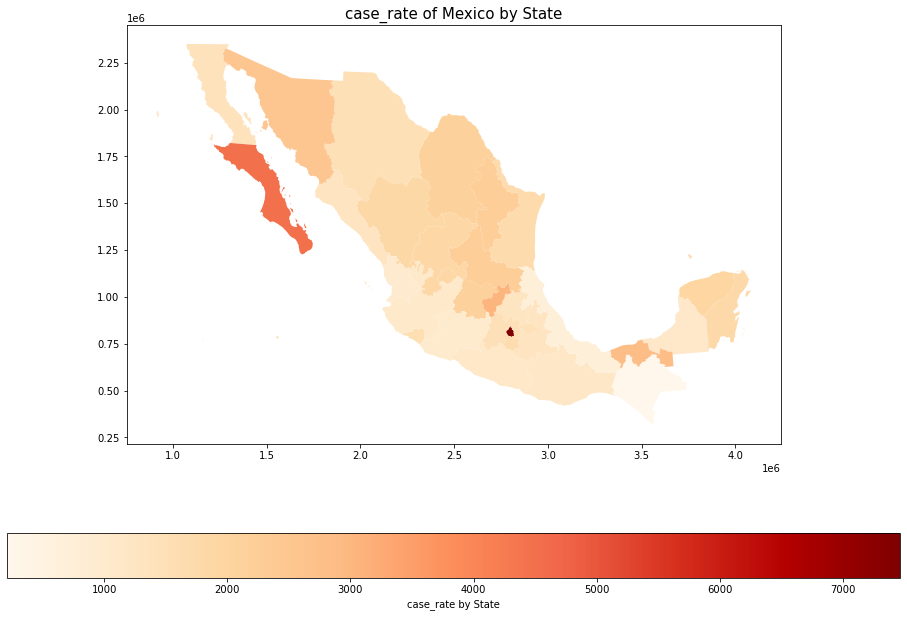

In [15]:
title = '{} of Mexico by State'.format(var_widget)
ax1 = df_admin1.plot(column=var_widget, 
                     cmap='OrRd',
                     legend=True, 
                     legend_kwds={'label': '{} by State'.format(var_widget), 
                                  'orientation': 'horizontal'},
                     figsize=(16, 11));
ax1.set_title(title, fontsize=15);

The variables of most interest where the ones that demonstrated the highest correlation on the Week 3 analyzes and the variables obtain in the Week 1 analyzes. This were the ones that were plotted and analyzed in this week analyzes:

- Case rate ('case_rate'):
The states with the highest cases rate have the biggest cities of the country but also in the states with the most attractive tourist places.

- Case rate last 60 days ('case_rate_last_60_days'):
The previous statement of the previous variable also applies here but a certain difference exists, now not all the biggest cities have the highest case rate instead the ones with the highest are the ones that are more attractive for tourist, we assume that due the vaccination campaingns that every country is implementing a lot of tourist of other or even of the same country are now visiting the tourist areas more frequently since a lot more people are vaccinated.

- Population density ('case_rate'):
The center of the country can be seen notoriously that has the highest population density and it also has one of the highest case rates in the country.

- Mental problems ('pct_mental_problems'):
We can see that mostly in the states that have urban areas is where the highest percentages of population with mental problems are concentrated.

- No health problems ('pct_no_problems'):
We can see that the previous statement also applies here so that mostly in the states that have urban areas is where the highest percentages of population with no health problems are concentrated.

- Obesity ('pct_pop_obesity'):
In the case of the obesity we could see that in the north and south of the country demonstrated the highest percentage of obesity we assume that this is because of the policys that have been implemented since 2020 ([GOBIERNO DE MEXICO](https://www.insp.mx/avisos/5091-dia-mundial-obesidad-politicas.html)), in which a lot of junk foods have being prohibited to be bought by minors and also this type of food are now labeled with precautions that contain and alert of an excess of a certain substance that can lead to develop obesity, this policys have being implemented first in the center of the country well in the north and the south are still relatively new.



This statements can be corrovorated by selecting the variables listed on the select menu.

## Heatmap of correlation variables with case/death rate

The variables to correlated are selected

In [16]:
df = var_admin1[['case_rate', 'case_rate_last_60_days', 'death_rate',
       'death_rate_last_60_days',var_widget]].copy()

The correlation of the variable selected with the case/death rate can be observed as following

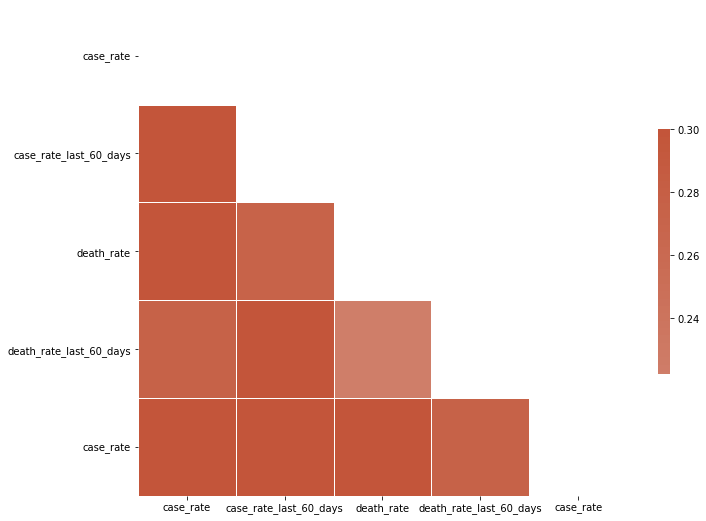

In [17]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.set_context('paper', font_scale=2)
heatmap = heatmap.get_figure()

This correlation can show a direct and more discreate visual representation compared to the Week 3 analyzes but it has the limitation of only using one variable to see is correlation.